In [1]:
import numpy as np


In [2]:
import pandas as pd


In [3]:
data1 = pd.read_csv("All_Data_Sains.csv")


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

In [5]:
data1.head(5)


,supermarket,prices_(£),prices_unit_(£),unit,names,date,category,own_brand
0,Sains,6.00,0.20,unit,Bassetts Vitamins Omega-3 & Multivits 3-6 Soft...,20240413,baby_products,False
1,Sains,2.35,11.75,kg,Annabel Karmel Chicken & Potato Pie Toddler Me...,20240413,baby_products,False
2,Sains,2.35,11.75,kg,Annabel Karmel Beef Cottage Pie Toddler Meal 2...,20240413,baby_products,False
3,Sains,2.15,6.30,kg,Yeo Valley Organic Little Yeos 4x85g,20240413,baby_products,False
4,Sains,0.75,7.50,kg,The Collective Suckies Strawberry Kids Yoghurt...,20240413,baby_products,False


In [6]:
# Convert date column to datetime format
data1['date'] = pd.to_datetime(data1['date'], format='%Y%m%d')

# Convert own_brand to boolean
data1['own_brand'] = data1['own_brand'].astype(bool)

In [7]:
# Average prices for own-brand vs non-own-brand products
avg_price_by_brand = data1.groupby('own_brand')['prices_(£)'].mean()
avg_price_per_unit_by_brand = data1.groupby('own_brand')['prices_unit_(£)'].mean()

print("\nAverage price by brand (own-brand vs non-own-brand):")
print(avg_price_by_brand)

print("\nAverage price per unit by brand (own-brand vs non-own-brand):")
print(avg_price_per_unit_by_brand)



Average price by brand (own-brand vs non-own-brand):
own_brand
False    6.090546
True     3.347221
Name: prices_(£), dtype: float64

Average price per unit by brand (own-brand vs non-own-brand):
own_brand
False    57.164247
True     18.172827
Name: prices_unit_(£), dtype: float64


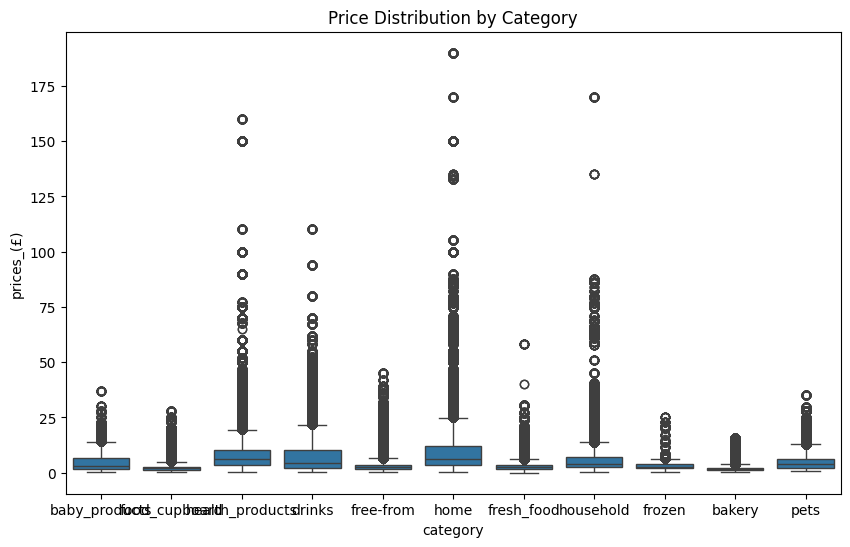

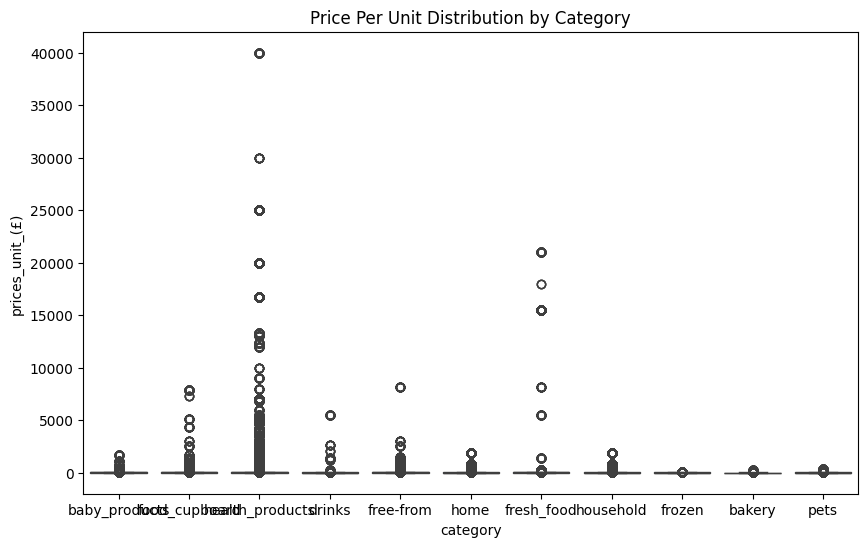

In [8]:
# Price distribution by category
plt.figure(figsize=(10, 6))
sns.boxplot(data=data1, x='category', y='prices_(£)')
plt.title('Price Distribution by Category')
plt.show()

# Price per unit distribution by category
plt.figure(figsize=(10, 6))
sns.boxplot(data=data1, x='category', y='prices_unit_(£)')
plt.title('Price Per Unit Distribution by Category')
plt.show()


In [9]:
# Top 5 most expensive products by price
top_5_expensive = data1.nlargest(5, 'prices_(£)')
print("\nTop 5 most expensive products by price:")
print(top_5_expensive[['names', 'prices_(£)']])

# Top 5 least expensive products by price
top_5_cheap = data1.nsmallest(5, 'prices_(£)')
print("\nTop 5 least expensive products by price:")
print(top_5_cheap[['names', 'prices_(£)']])

# Top 5 products by price per unit
top_5_expensive_per_unit = data1.nlargest(5, 'prices_unit_(£)')
print("\nTop 5 most expensive products by price per unit:")
print(top_5_expensive_per_unit[['names', 'prices_unit_(£)']])



Top 5 most expensive products by price:
                                      names  prices_(£)
20785   Kenwood Prospero+ Stand Mixer White       190.0
42238   Kenwood Prospero+ Stand Mixer White       190.0
66710   Kenwood Prospero+ Stand Mixer White       190.0
87113   Kenwood Prospero+ Stand Mixer White       190.0
127598  Kenwood Prospero+ Stand Mixer White       190.0

Top 5 least expensive products by price:
                                          names  prices_(£)
2339329              Sainsbury's 6 Pack Bedding        0.01
2367407              Sainsbury's 6 Pack Bedding        0.01
391022                  Sainsbury's Carrots 1kg        0.15
396780   Sainsbury's British White Potatoes 2kg        0.15
396791                Sainsbury's Parsnips 500g        0.15

Top 5 most expensive products by price per unit:
                                                    names  prices_unit_(£)
295908  Colgate Max White Ultimate At Home LED Teeth W...          40000.0
314047  Colgate Max W

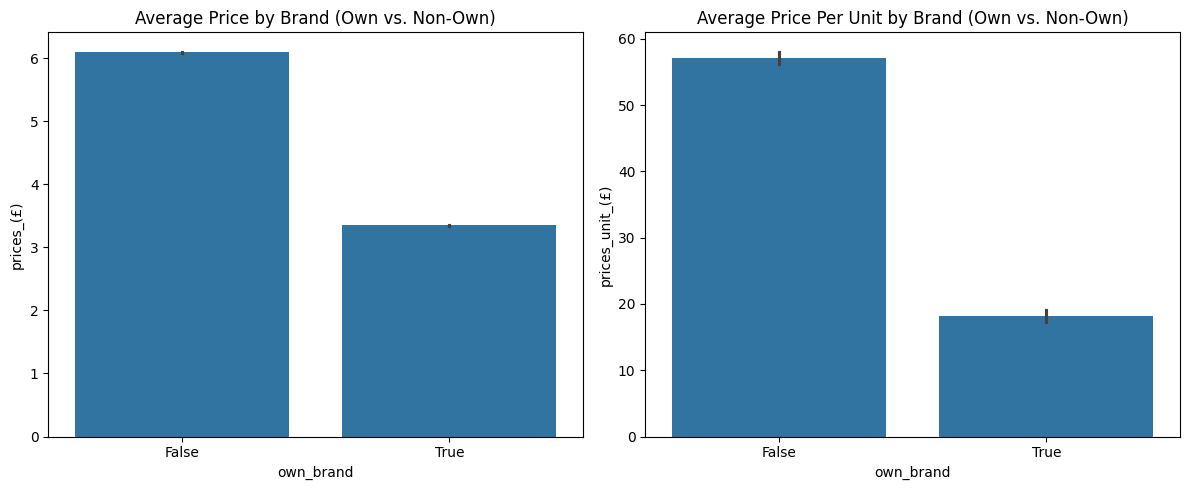

In [10]:
# Visualize average price and price per unit by brand
plt.figure(figsize=(12, 5))

# Average Price by Brand
plt.subplot(1, 2, 1)
sns.barplot(data=data1, x='own_brand', y='prices_(£)')
plt.title('Average Price by Brand (Own vs. Non-Own)')

# Average Price Per Unit by Brand
plt.subplot(1, 2, 2)
sns.barplot(data=data1, x='own_brand', y='prices_unit_(£)')
plt.title('Average Price Per Unit by Brand (Own vs. Non-Own)')

plt.tight_layout()
plt.show()


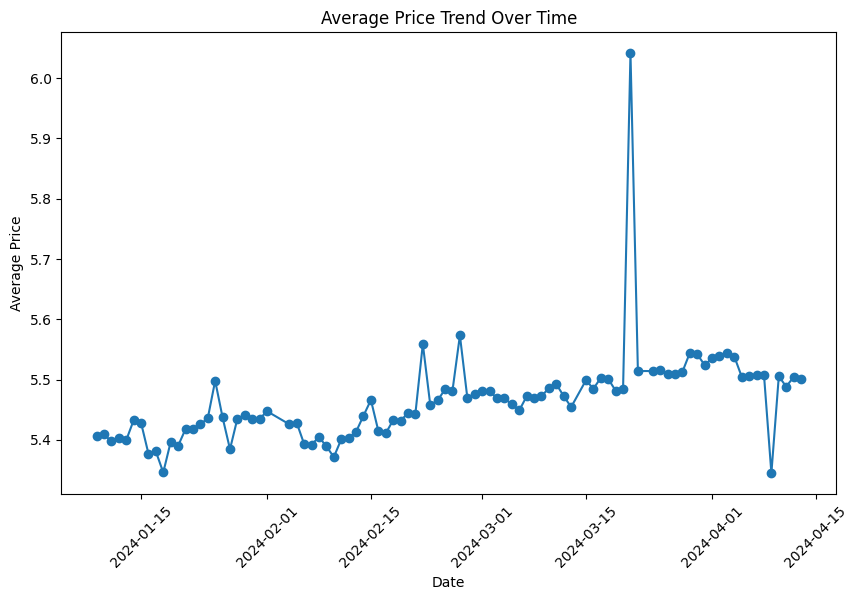

In [11]:
# Average price trend over time (if there are multiple dates)
if data1['date'].nunique() > 1:
    data1_date_trend = data1.groupby('date')['prices_(£)'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    plt.plot(data1_date_trend['date'], data1_date_trend['prices_(£)'], marker='o')
    plt.title('Average Price Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.show()


In [12]:
def price_range_by_category(data1):
    price_range = data1.groupby('category')['prices_(£)'].agg(lambda x: x.max() - x.min())
    print("\nPrice Range by Category:")
    print(price_range)


In [13]:
def highest_avg_price_by_category(data1):
    avg_price = data1.groupby('category')['prices_(£)'].mean().sort_values(ascending=False)
    print("\nCategories with Highest Average Prices:")
    print(avg_price)


In [14]:
def brand_comparison_count_and_avg_price(data1):
    brand_comparison = data1.groupby('own_brand').agg(
        count=('prices_(£)', 'size'),
        avg_price=('prices_(£)', 'mean')
    )
    print("\nComparison of Own-brand vs. Non-own-brand (Count and Average Price):")
    print(brand_comparison)


In [15]:
def top_3_frequent_categories(data1):
    top_categories = data1['category'].value_counts().nlargest(3)
    print("\nTop 3 Most Frequent Categories:")
    print(top_categories)


In [16]:
price_range_by_category(data1)
highest_avg_price_by_category(data1)
brand_comparison_count_and_avg_price(data1)
top_3_frequent_categories(data1)



Price Range by Category:
category
baby_products       36.52
bakery              15.10
drinks             109.70
food_cupboard       27.81
free-from           44.85
fresh_food          57.99
frozen              24.56
health_products    159.75
home               189.61
household          169.65
pets                34.50
Name: prices_(£), dtype: float64

Categories with Highest Average Prices:
category
home               9.514890
drinks             8.012590
health_products    7.720536
household          6.060723
pets               4.983423
baby_products      4.762346
free-from          3.513609
frozen             3.010511
fresh_food         2.933088
food_cupboard      2.302412
bakery             2.293711
Name: prices_(£), dtype: float64

Comparison of Own-brand vs. Non-own-brand (Count and Average Price):
             count  avg_price
own_brand                    
False      2006487   6.090546
True        593802   3.347221

Top 3 Most Frequent Categories:
category
health_products    5150

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [18]:
data1['own_brand'] = data1['own_brand'].astype(int)  # Encode own_brand as 0 or 1
data1['date'] = pd.to_datetime(data1['date'], format='%Y%m%d')  # Convert date if needed

In [19]:
# Define features (X) and target (y)
X = data1[['category', 'supermarket', 'own_brand']]  # You can add more relevant features
y = data1['prices_unit_(£)']  # Target variable

In [20]:
# Encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['own_brand']),
        ('cat', OneHotEncoder(drop='first'), ['category', 'supermarket'])
    ])

In [21]:
# Define models
models = {
    'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())]),
    'Random Forest': Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(n_estimators=100, random_state=42))]),
    'Gradient Boosting': Pipeline(steps=[('preprocessor', preprocessor), ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))])
}

In [22]:
missing_y = data1['prices_unit_(£)'].isna().sum()
print(f"Missing values in 'prices_unit_': {missing_y}")

Missing values in 'prices_unit_': 209


In [23]:
data1 = data1.dropna(subset=['prices_unit_(£)'])

In [24]:
X = data1[['category', 'supermarket', 'own_brand']]
y = data1['prices_unit_(£)']

In [25]:
data1['prices_unit_(£)'] = data1['prices_unit_(£)'].fillna(data1['prices_unit_(£)'].mean())

In [26]:
# Check for missing values in 'prices_unit_' column before dropping/filling
print(f"Missing values in 'prices_unit_(£)' before cleaning: {data1['prices_unit_(£)'].isna().sum()}")

# Drop rows where 'prices_unit_' is NaN
data1 = data1.dropna(subset=['prices_unit_(£)'])

# Confirm that there are no missing values in 'prices_unit_'
print(f"Missing values in 'prices_unit_(£)' after cleaning: {data1['prices_unit_(£)'].isna().sum()}")


Missing values in 'prices_unit_(£)' before cleaning: 0
Missing values in 'prices_unit_(£)' after cleaning: 0


In [27]:
# Redefine X and y after cleaning
X = data1[['category', 'supermarket', 'own_brand']]
y = data1['prices_unit_(£)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the models as before
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'R^2 Score': r2
    }

# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)



Model Performance Comparison:
                         MAE            MSE  R^2 Score
Linear Regression  67.457732  354357.648350   0.011139
Random Forest      67.311754  354084.103153   0.011902
Gradient Boosting  67.226415  354084.930143   0.011900


In [28]:
# Dictionary to store results and predictions
results = {}
predictions = {}

for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'R^2 Score': r2
    }
    
    # Store predictions
    predictions[name] = y_pred

# Display model performance comparison
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)

# Show predictions
predictions_df = pd.DataFrame({
    'Actual': y_test,  # Actual test values
    'Linear Regression Prediction': predictions['Linear Regression'],
    'Random Forest Prediction': predictions['Random Forest'],
    'Gradient Boosting Prediction': predictions['Gradient Boosting']
})

# Display the first few predictions for comparison
print("\nSample Predictions Comparison:")
print(predictions_df.head(10))  # Display first 10 predictions for each model



Model Performance Comparison:
                         MAE            MSE  R^2 Score
Linear Regression  67.457732  354357.648350   0.011139
Random Forest      67.311754  354084.103153   0.011902
Gradient Boosting  67.226415  354084.930143   0.011900

Sample Predictions Comparison:
         Actual  Linear Regression Prediction  Random Forest Prediction  \
993411    10.00                    175.420625                183.121719   
159814     0.60                     16.031855                 14.336201   
2062754    5.00                    175.420625                183.121719   
350008     9.20                     19.807791                 16.937255   
1954077    9.00                     15.942554                 16.004205   
1701787    4.00                    175.420625                183.121719   
879612     0.76                     15.942554                 16.004205   
2055688    5.00                      2.371654                  6.635585   
20266      3.25                     15.942